In [207]:
import pandas as pd
import numpy as np
import os 
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
#merging processed file into raw merge file for further processing
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "processed").exists())

#creating 2 columns to identify source file and if ios or android
df = pd.read_csv(root / "data" / "processed" / "merged" / "parent_clean.csv", header=0)
df = df[df['eventSensorDetectionMthd'] == 1]
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/shazi/Documents/VS Code/Arity - BTT Project 1/ARITY-BTT-PROJECT-1/data/processed/merged/parent_clean.csv'

In [ ]:
df.columns.tolist()

['is_ios',
 'source_file',
 'eventType',
 'eventSampleSpeed',
 'eventDurationSeconds',
 'eventMilesDriven',
 'eventGPSSignalStrength',
 'eventStartSpeed',
 'eventEndSpeed',
 'memsMedianHorizontalNorm',
 'gyro_angular_change_per_second',
 'gyroAngleChange',
 'mems_radius',
 'eventSpeedChange']

In [ ]:
# columns to keep (with the earlier-dropped ones removed)
keep_cols = [
    'is_ios',
    'source_file',
    "eventType",
    "eventSampleSpeed",
    "eventDurationSeconds",
    "eventMilesDriven",
    "eventSensorDetectionMthd",
    "eventGPSSignalStrength",
    "eventStartSpeed",
    "eventEndSpeed",
    "memsMedianHorizontalNorm",
    "memsP75HorizontalNorm",
    "memsP95HorizontalNorm",
    "gyro_angular_change_per_second",
    "gyroAngleChange",
    "mems_radius"
]

# keep only these columns
df = df[[c for c in keep_cols if c in df.columns]]

print(df.columns.to_list())

['is_ios', 'source_file', 'eventType', 'eventSampleSpeed', 'eventDurationSeconds', 'eventMilesDriven', 'eventSensorDetectionMthd', 'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed', 'memsMedianHorizontalNorm', 'memsP75HorizontalNorm', 'memsP95HorizontalNorm', 'gyro_angular_change_per_second', 'gyroAngleChange', 'mems_radius']


In [ ]:
df.shape

(56784, 16)

In [ ]:
df.groupby("source_file")["memsMedianHorizontalNorm"].describe()

,count,mean,std,min,25%,50%,75%,max
source_file,,,,,,,,
android_turns.csv,1148.0,1.813858,0.999211,0.152835,1.274197,1.754192,2.202498,15.138969
ios_turns.csv,55636.0,2.019915,1.110210,0.007562,1.336542,1.866387,2.467759,29.881191


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_4225/3200314501.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


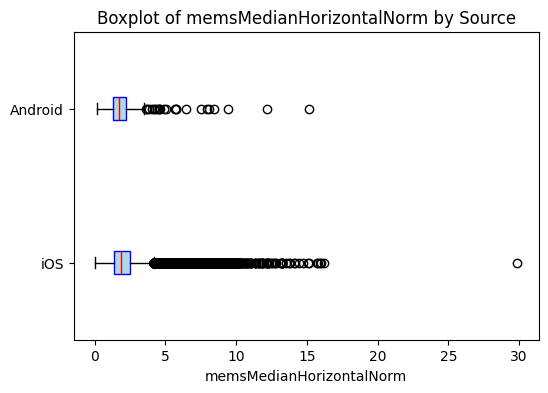

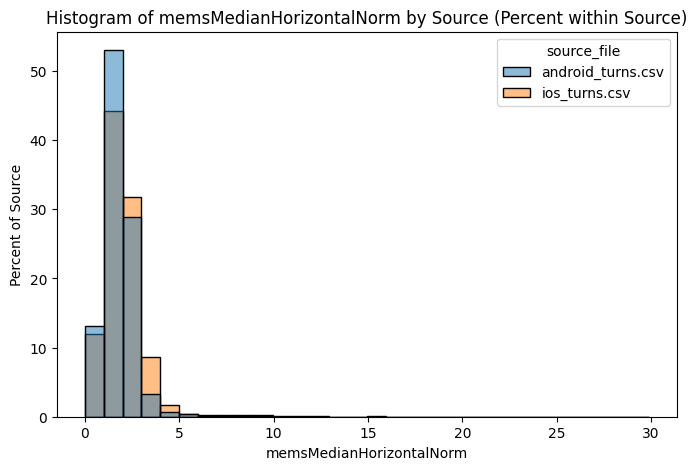

In [ ]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['memsMedianHorizontalNorm']
android_data = df[df['is_ios'] == 0]['memsMedianHorizontalNorm']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of memsMedianHorizontalNorm by Source")
plt.xlabel("memsMedianHorizontalNorm")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="memsMedianHorizontalNorm", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of memsMedianHorizontalNorm by Source (Percent within Source)")
plt.xlabel("memsMedianHorizontalNorm")
plt.ylabel("Percent of Source")
plt.show()

In [ ]:
df[df['memsMedianHorizontalNorm'] > 15]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius
952,0,android_turns.csv,5.0,5.790157,5.939360,0.013660,0.0,4.493041,3.001880,6.425670,15.138969,25.500704,46.254982,1.299296,7.764041,4.170873
6632,1,ios_turns.csv,5.0,6.113079,2.936750,0.005434,0.0,4.725771,7.577500,5.753754,15.170236,21.621105,38.918860,3.775002,11.238105,1.185059
14655,1,ios_turns.csv,4.0,6.791724,1.971062,0.004293,0.0,4.743431,7.433039,7.208134,16.027048,24.269312,34.990490,16.371885,32.928580,3.754021
24757,1,ios_turns.csv,5.0,6.235659,3.949188,0.029730,0.0,6.765160,8.526132,3.320038,15.052169,22.956871,40.922592,6.838202,27.280909,6.285867
27827,1,ios_turns.csv,4.0,12.625673,1.961250,0.005886,0.0,5.254562,13.496828,10.247534,15.933853,16.838737,19.196880,53.025536,106.118710,1.446076
41779,1,ios_turns.csv,4.0,5.476859,0.965422,0.005747,0.0,7.152839,5.783536,5.170182,15.711466,21.732285,29.056820,3.080060,3.097455,7.835816
48588,1,ios_turns.csv,4.0,10.063519,0.953234,0.003774,0.0,4.814445,9.508160,10.618877,16.240120,16.335320,16.784903,1.961987,1.948160,4042.909200
50031,1,ios_turns.csv,4.0,6.822870,0.957875,0.002371,0.0,4.688431,6.631047,7.014693,29.881191,35.152584,44.420760,74.887930,74.722170,1.434486
54843,1,ios_turns.csv,5.0,9.931807,1.955625,0.006554,0.0,4.740307,8.908216,10.705002,15.794904,16.133326,17.105710,1.972368,3.937570,264.328280


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_4225/3245568579.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


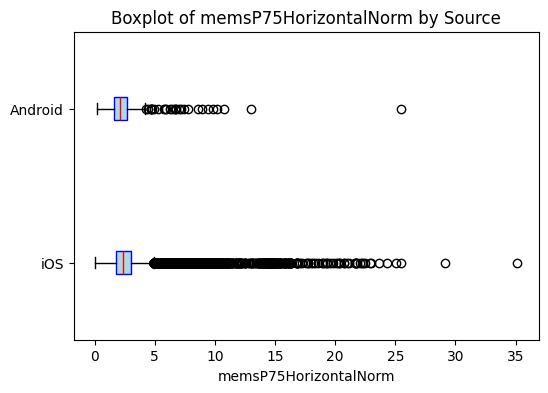

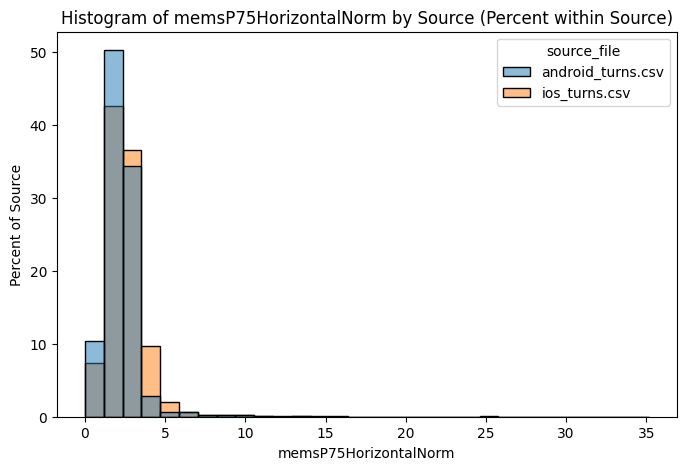

In [ ]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['memsP75HorizontalNorm']
android_data = df[df['is_ios'] == 0]['memsP75HorizontalNorm']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of memsP75HorizontalNorm by Source")
plt.xlabel("memsP75HorizontalNorm")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="memsP75HorizontalNorm", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of memsP75HorizontalNorm by Source (Percent within Source)")
plt.xlabel("memsP75HorizontalNorm")
plt.ylabel("Percent of Source")
plt.show()

In [ ]:
df[(df['memsP75HorizontalNorm'] > 15) & (df['source_file'] == 'android_turns.csv')]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius
952,0,android_turns.csv,5.0,5.790157,5.93936,0.01366,0.0,4.493041,3.00188,6.42567,15.138969,25.500704,46.254982,1.299296,7.764041,4.170873


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_4225/836768223.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


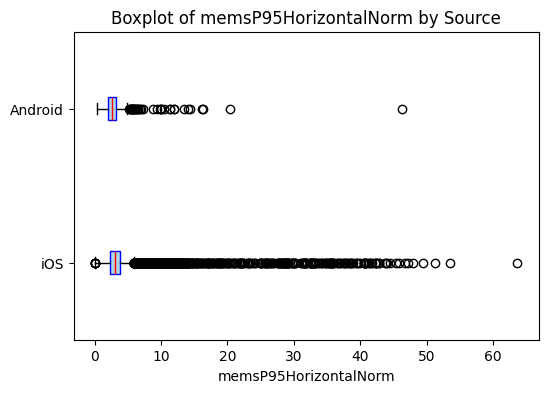

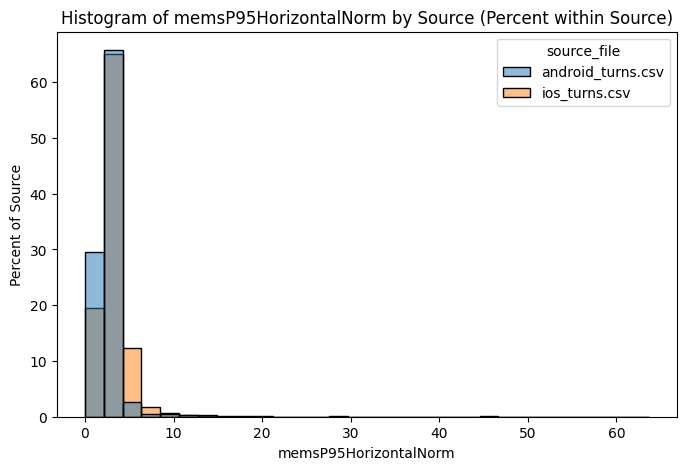

In [ ]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['memsP95HorizontalNorm']
android_data = df[df['is_ios'] == 0]['memsP95HorizontalNorm']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of memsP95HorizontalNorm by Source")
plt.xlabel("memsP95HorizontalNorm")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="memsP95HorizontalNorm", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of memsP95HorizontalNorm by Source (Percent within Source)")
plt.xlabel("memsP95HorizontalNorm")
plt.ylabel("Percent of Source")
plt.show()

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_4225/1063449005.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


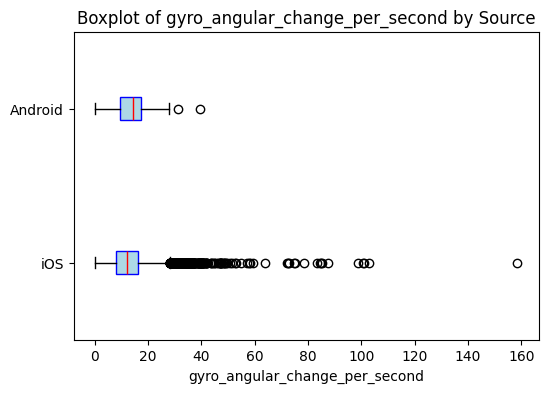

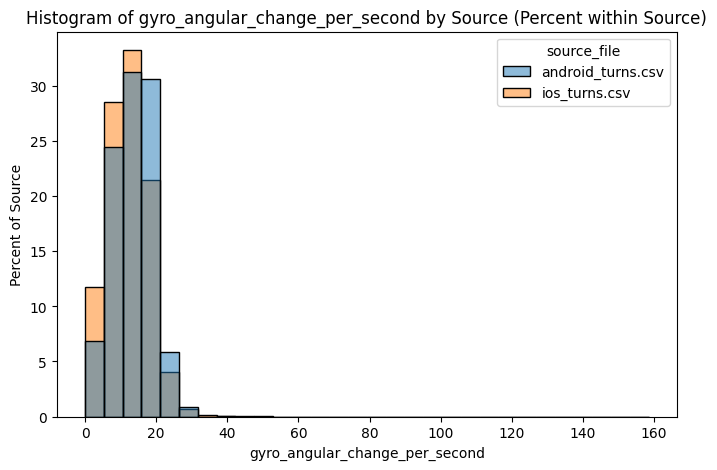

In [ ]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['gyro_angular_change_per_second']
android_data = df[df['is_ios'] == 0]['gyro_angular_change_per_second']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gyro_angular_change_per_second by Source")
plt.xlabel("gyro_angular_change_per_second")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="gyro_angular_change_per_second", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of gyro_angular_change_per_second by Source (Percent within Source)")
plt.xlabel("gyro_angular_change_per_second")
plt.ylabel("Percent of Source")
plt.show()

In [ ]:
df[df['gyro_angular_change_per_second'] > 100]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius
17988,1,ios_turns.csv,5.0,17.965996,0.955000,0.009690,0.0,6.095498,18.476896,17.455095,6.680372,9.334602,11.726278,100.92776,100.40210,1.563272
19910,1,ios_turns.csv,5.0,24.231146,1.963000,0.013987,0.0,4.781910,24.526293,23.856098,3.291846,5.590874,15.000029,100.59613,201.50021,0.744900
21319,1,ios_turns.csv,4.0,6.407975,0.958313,0.002011,0.0,4.800277,4.767684,8.048265,9.763654,11.084121,15.349679,102.87653,102.69571,1.016028
30611,1,ios_turns.csv,4.0,19.234531,0.960203,0.005589,0.0,4.724898,18.001537,20.467527,4.691605,8.615368,12.616044,158.51184,158.54540,0.905455


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_4225/4053563035.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


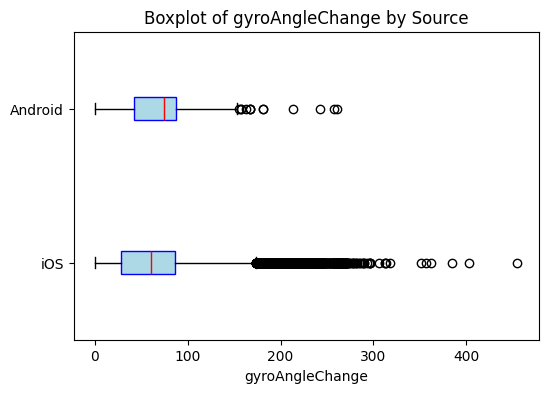

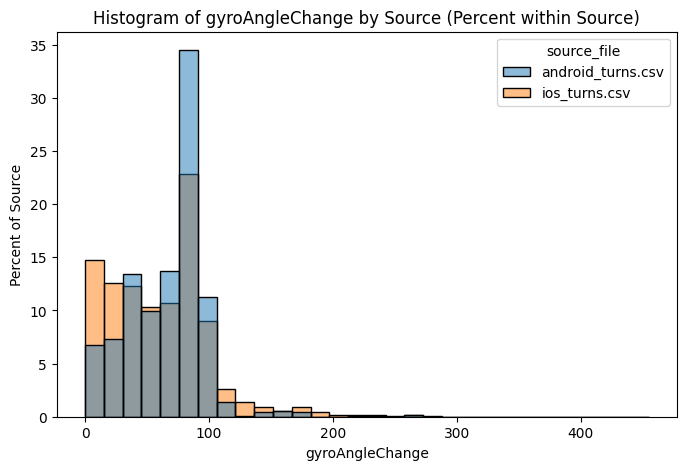

In [ ]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['gyroAngleChange']
android_data = df[df['is_ios'] == 0]['gyroAngleChange']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gyroAngleChange by Source")
plt.xlabel("gyroAngleChange")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="gyroAngleChange", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of gyroAngleChange by Source (Percent within Source)")
plt.xlabel("gyroAngleChange")
plt.ylabel("Percent of Source")
plt.show()

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_4225/2416860586.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


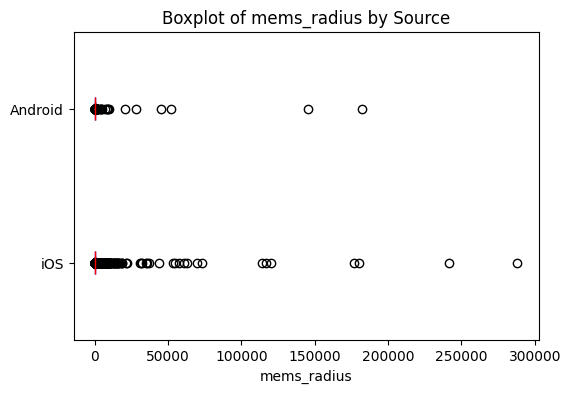

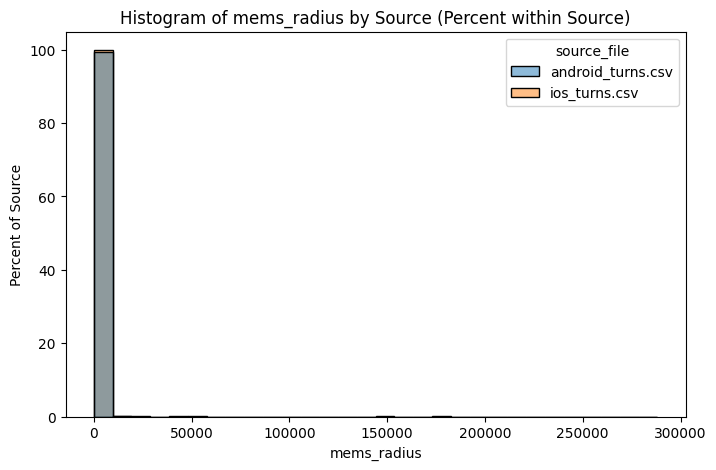

In [ ]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['mems_radius']
android_data = df[df['is_ios'] == 0]['mems_radius']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of mems_radius by Source")
plt.xlabel("mems_radius")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="mems_radius", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of mems_radius by Source (Percent within Source)")
plt.xlabel("mems_radius")
plt.ylabel("Percent of Source")
plt.show()

In [ ]:
df['mems_radius'].describe()

count     56784.000000
mean        122.072551
std        2496.818054
min           0.396203
25%          13.332791
50%          24.207271
75%          48.170028
max      288211.660000
Name: mems_radius, dtype: float64

In [ ]:
df[df['mems_radius'] > 1000]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius
13,0,android_turns.csv,5.0,5.950260,1.983875,0.002211,0.0,11.224490,6.352909,5.771305,5.749575,5.841262,6.543166,2.600079,5.261395,6954.3950
17,0,android_turns.csv,5.0,12.407560,1.984344,0.006954,0.0,7.142857,9.954382,15.367777,0.287022,0.407114,0.511658,0.098713,0.199798,8054.9233
45,0,android_turns.csv,4.0,19.489336,2.935207,0.010967,0.0,9.183674,28.453875,9.797797,1.856103,2.135851,2.432933,0.011387,0.033874,52144.4200
52,0,android_turns.csv,5.0,7.122416,3.927145,0.005471,0.0,9.183674,15.166451,0.022369,1.973869,2.594234,3.302151,0.011355,0.045043,45430.4400
59,0,android_turns.csv,5.0,7.143295,1.983938,0.003189,0.0,12.755102,6.800297,8.120091,0.186042,0.272102,0.684511,0.109534,0.219483,8602.0110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56319,1,ios_turns.csv,5.0,5.063438,1.963250,0.003845,0.0,5.000000,4.833282,5.293594,8.654201,8.777243,8.977795,1.995084,3.996784,2217.9587
56520,1,ios_turns.csv,4.0,10.146343,0.955839,0.009050,0.0,8.895979,9.438302,10.854386,9.173338,9.482079,9.757817,3.695000,3.678986,2896.9620
56531,1,ios_turns.csv,4.0,20.757320,2.960707,0.022609,0.0,5.340796,22.341547,19.990316,0.619032,0.775289,1.115109,1.233320,3.700844,2318.8374
56587,1,ios_turns.csv,5.0,10.041267,1.922313,0.010194,0.0,4.754875,10.746500,9.466656,3.712784,3.881065,4.444217,4.118150,8.081297,1302.1167


In [ ]:
# find all infinite values in mems_radius
df[np.isinf(df['mems_radius'])]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_4225/2324194745.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


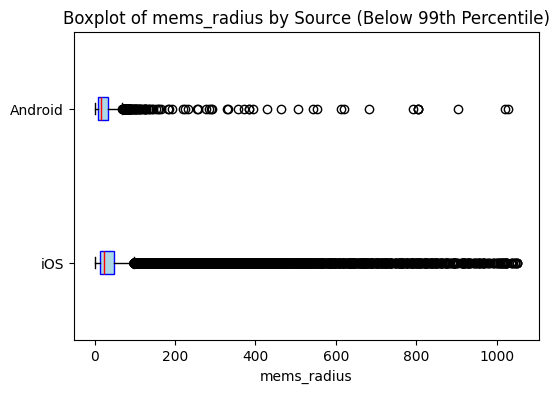

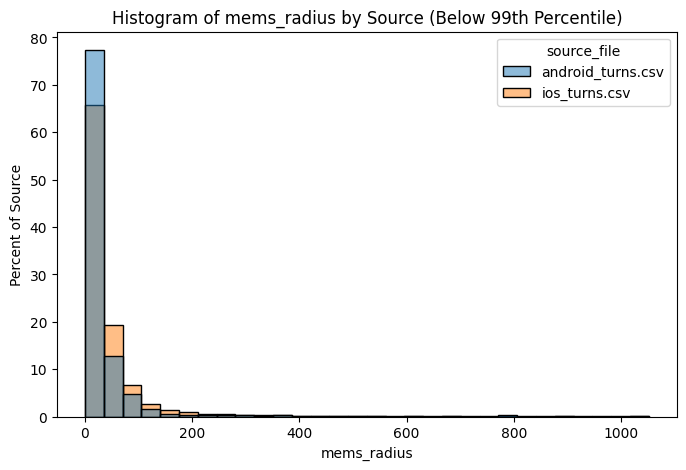

Original size: 56784
New size: 56216
Difference: 568


In [ ]:
# Compute 95th percentile threshold
ios_subset = df[df['is_ios'] == 1]
android_subset = df[df['is_ios'] == 0]

Q_ios = ios_subset['mems_radius'].quantile(0.95)
Q_android = android_subset['mems_radius'].quantile(0.95)

filtered_ios = ios_subset[ios_subset['mems_radius'] <= Q_ios].copy()
filtered_android = android_subset[android_subset['mems_radius'] <= Q_android].copy()

# ---------------------- BOX PLOT ----------------------
plt.figure(figsize=(6,4))

ios_radius = filtered_ios['mems_radius']
android_radius = filtered_android['mems_radius']
new_df_95 = pd.concat([filtered_ios, filtered_android], ignore_index=True)

plt.boxplot(
    [ios_radius, android_radius],
    vert=False,
    labels=["iOS", "Android"],
    patch_artist=True,   # enables color fill
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red"),
)

plt.title("Boxplot of mems_radius by Source (Below 95th Percentile)")
plt.xlabel("mems_radius")
plt.show()

# ---------------------- HISTOGRAM ----------------------
plt.figure(figsize=(8,5))
sns.histplot(
    data=new_df, 
    x="mems_radius", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of mems_radius by Source (Below 95th Percentile)")
plt.xlabel("mems_radius")
plt.ylabel("Percent of Source")
plt.show()

print(f"Original size: {df.shape[0]}\nNew size: {new_df.shape[0]}\nDifference: {df.shape[0] - new_df.shape[0]}")


In [ ]:
# Compute 95th percentile threshold
Q = df['mems_radius'].quantile(0.95)
df = df[df['mems_radius'] <= Q]

df.shape[0]

53944

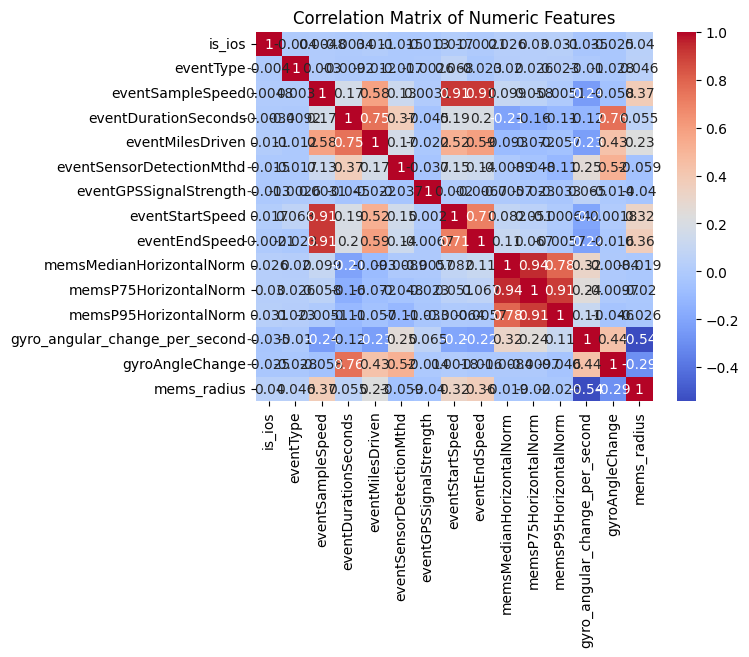

In [ ]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlations
corr_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [ ]:
df.drop(columns=["memsP75HorizontalNorm", "memsP95HorizontalNorm"], inplace=True)

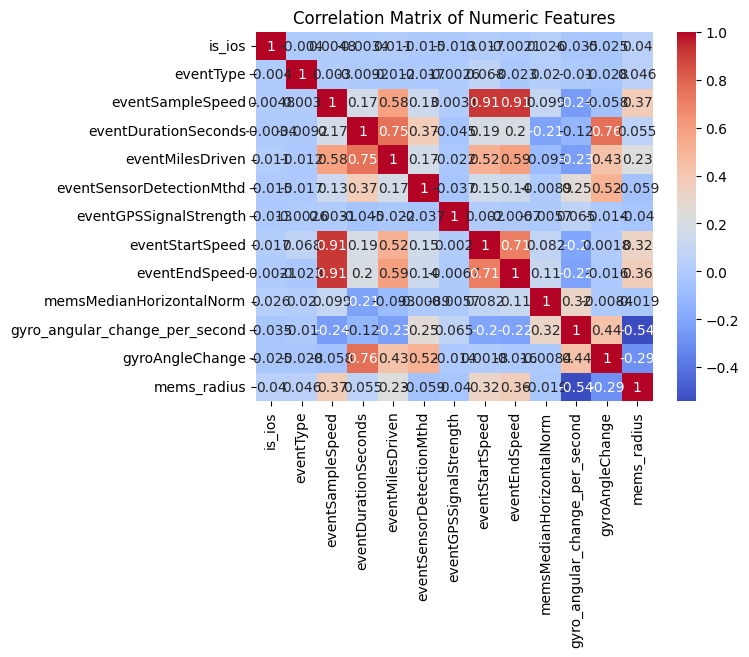

In [ ]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlations
corr_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [ ]:
df.to_csv(root / "data" / "processed" / "merged"/ "state1_clean.csv", index=False) 
df[df['is_ios'] == 0].to_csv(root / "data" / "processed" / "android"/ "state1_clean.csv", index=False)
df[df['is_ios'] == 1].to_csv(root / "data" / "processed" / "ios"/ "state1_clean.csv", index=False)